<a href="https://colab.research.google.com/github/ai-saturdays-guayaquil/Curso/blob/master/Lesson3DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.3)


In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [4]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [6]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}  
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}  
! unzip -q -n {path}/train_v2.csv.zip -d {path}

 99% 597M/600M [00:07<00:00, 69.9MB/s]
100% 600M/600M [00:07<00:00, 85.9MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 60.1MB/s]


In [0]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path}

In [10]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(42)
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

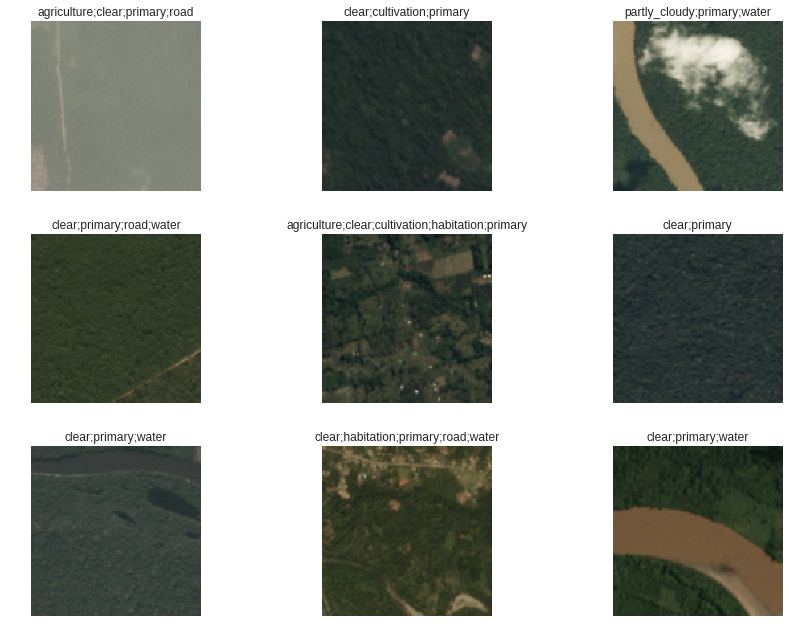

In [0]:


data.show_batch(rows=3, figsize=(12,9))



In [0]:


arch = models.resnet50



In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:03, 26163837.97it/s]


In [0]:


learn.lr_find()



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.29E-02


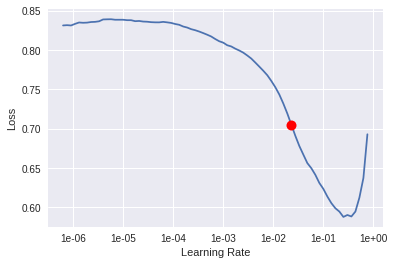

In [0]:


learn.recorder.plot()



In [0]:


lr = 0.01



In [0]:


learn.fit_one_cycle(5, slice(lr))



epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.123899,0.113071,0.946917,0.898804
2,0.108189,0.100605,0.954569,0.911938
3,0.106403,0.092781,0.952200,0.918391
4,0.093749,0.087659,0.953523,0.924318
5,0.091923,0.086827,0.956632,0.925769


In [0]:
learn.save('stage-1-rn50')

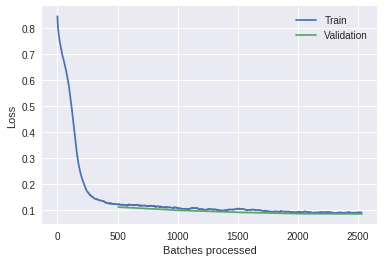

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.export()

In [0]:
data.c


17

In [0]:
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [0]:
test = ImageItemList.from_folder(path/'test-jpg').add(ImageItemList.from_folder(path/'test-jpg-additional'))
len(test)

1

In [0]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

 98% 297M/304M [00:03<00:00, 75.9MB/s]
100% 304M/304M [00:03<00:00, 84.7MB/s]


In [0]:
test = ImageItemList.from_folder(path/'test-jpg').add(ImageItemList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [0]:


learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)



In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:


labelled_preds[:5]



['haze primary',
 'clear primary',
 'clear primary',
 'clear primary',
 'agriculture bare_ground clear primary']

In [0]:


fnames = [f.name[:-4] for f in learn.data.test_ds.items]



In [0]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [0]:
df

,image_name,tags
0,test_39083,haze primary
1,test_20003,clear primary
2,test_10232,clear primary
3,test_6204,clear primary
4,test_12469,agriculture bare_ground clear primary
5,test_8801,clear primary
6,test_18069,partly_cloudy primary
7,test_4211,clear primary
8,test_9146,clear primary
9,test_23621,blooming clear primary


In [0]:


df.to_csv(path/'submission.csv', index=False)



In [0]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"

100% 2.20M/2.20M [00:03<00:00, 720kB/s]
Successfully submitted to Planet: Understanding the Amazon from Space